# Naive Bayes

## Sources

- https://www.youtube.com/watch?v=O2L2Uv9pdDA&ab_channel=StatQuestwithJoshStarmer
- IDM 6.4 Naive Bayes Classifier

## Review

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Training Data

In [7]:
num_hams = 8
ham = {
    'dear': 8,
    'friend': 5,
    'lunch': 3,
    'money': 1
}

num_hams = 4
spam = {
    'dear': 2,
    'friend': 1,
    'lunch': 0,
    'money': 4
}

In [21]:
def plot_ham_spam(ham, spam):
    fig, axs = plt.subplots(2, 1, figsize=(8, 6))

    axs[0].bar(ham.keys(), ham.values(), color='blue')
    axs[0].set_title('Ham (8)')

    axs[1].bar(spam.keys(), spam.values(), color='red')
    axs[1].set_title('Spam (4)')

    max_value = max(max(ham.values()), max(spam.values()))
    axs[0].set_ylim([0, max_value+1])
    axs[1].set_ylim([0, max_value+1])

    plt.tight_layout()
    plt.show()

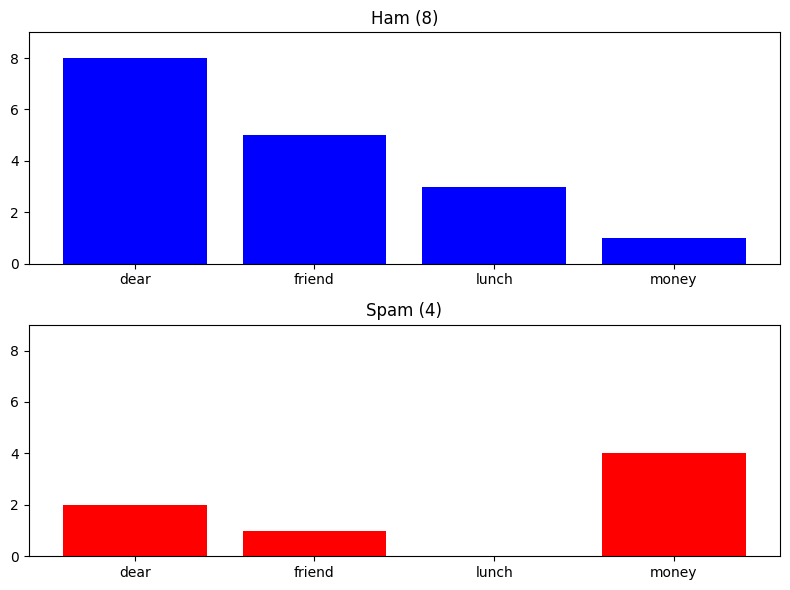

In [22]:
plot_ham_spam(ham, spam)

### Class Conditional Probabilities $P(X \mid Y)$
$$ P( \mathrm{dear} \mid \mathrm{Ham} ) = \frac{8}{17} = 0.47 $$
$$ P( \mathrm{dear} \mid \mathrm{Spam} ) = \frac{2}{7} = 0.29 $$

### Prior Probabilities $P(Y)$
$$ P( \mathrm{Ham} ) = \frac{8}{12} = 0.67 $$
$$ P( \mathrm{Spam} ) = \frac{4}{12} = 0.67 $$

### Posterior Probabilities $P(Y \mid X)$
Classify message "dear friend"
$$ P(\mathrm{Ham}) \times P( \mathrm{dear} \mid \mathrm{Ham} ) \times P( \mathrm{friend} \mid \mathrm{Ham} ) = 0.09 $$
$$ P(\mathrm{Spam}) \times P( \mathrm{dear} \mid \mathrm{Spam} ) \times P( \mathrm{friend} \mid \mathrm{Spam} ) = 0.01 $$

$0.09 > 0.01 \implies$ classify as $\mathrm{Spam}$

Classify message "lunch money money money"
$$ P(Spam \mid X) = 0 $$

### Solution Add Count

In [29]:
def add_count(word_count, a):
    new_word_count = {}
    for word in word_count:
        new_word_count[word] = word_count[word] + a
    return new_word_count

In [30]:
new_ham = add_count(ham, 1)
new_spam = add_count(spam, 1)

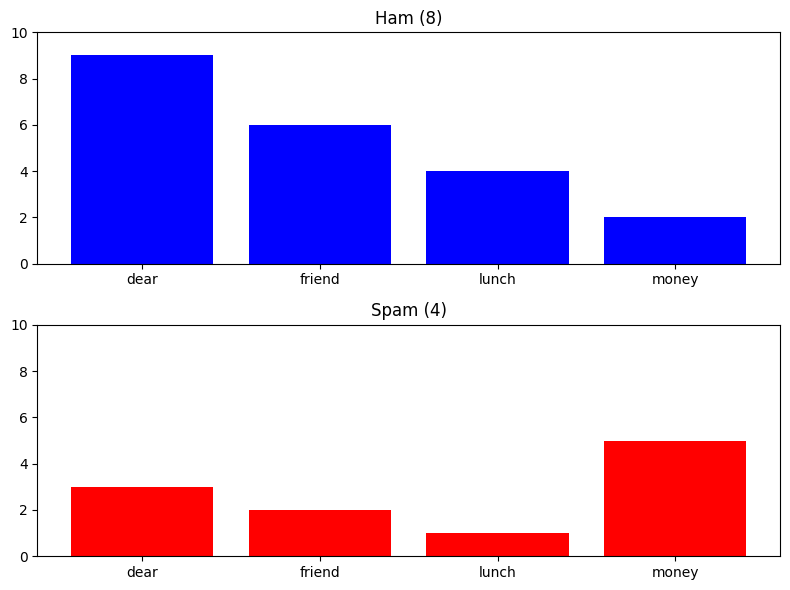

In [31]:
plot_ham_spam(new_ham, new_spam)

How estimate $P(x_i \mid y)$?
- categorical attributes
- continuous attributes
    - discretize
    - assume a certain probability distribution